#Author : Jay Shukla
##Task 3 : Prediction using Decision Tree Algorithm
##GRIP @ The Sparks Foundation

Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks, and even multioutput tasks.For the given ‘Iris’ dataset, I created the Decision Tree classifier and visualized it graphically. The purpose of this task is if we feed any new data to this classifier, it would be able to predict the right class accordingly.  

## Importing Libraries

In [1]:
# Importing libraries in Python
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import pydot
from IPython.display import Image

## Loading Dataset

In [2]:
iris = load_iris()
X=iris.data[:,:] 
y=iris.target

### Data Preprocessing

In [3]:
data=pd.DataFrame(iris['data'],columns=["Petal length","Petal Width","Sepal Length","Sepal Width"])
data['Species']=iris['target']
data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.describe()

,Petal length,Petal Width,Sepal Length,Sepal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Data Visualisation

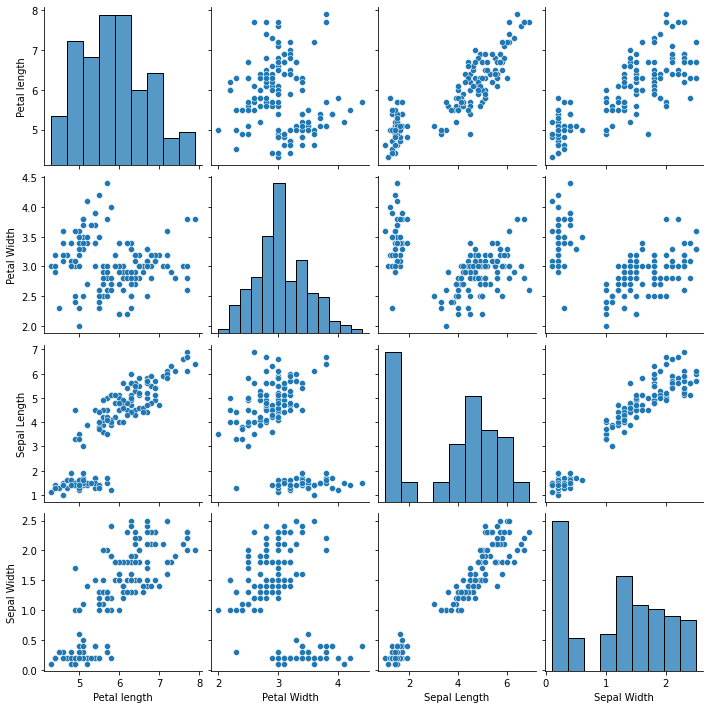

In [5]:
sns.pairplot(data)

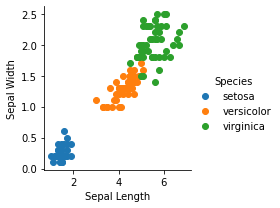

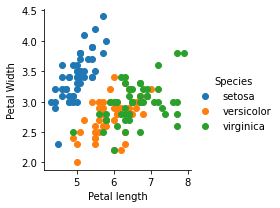

In [6]:
# Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Sepal Length','Sepal Width').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(data,hue='Species').map(plt.scatter,'Petal length','Petal Width').add_legend()
plt.show()

## Creating the Model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
print("Training Complete.")
y_pred = tree_classifier.predict(X_test)

Training Complete.


### Making a dataframe consisting True & Predicted Data

In [8]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2


## Visualising the Decision Tree Model

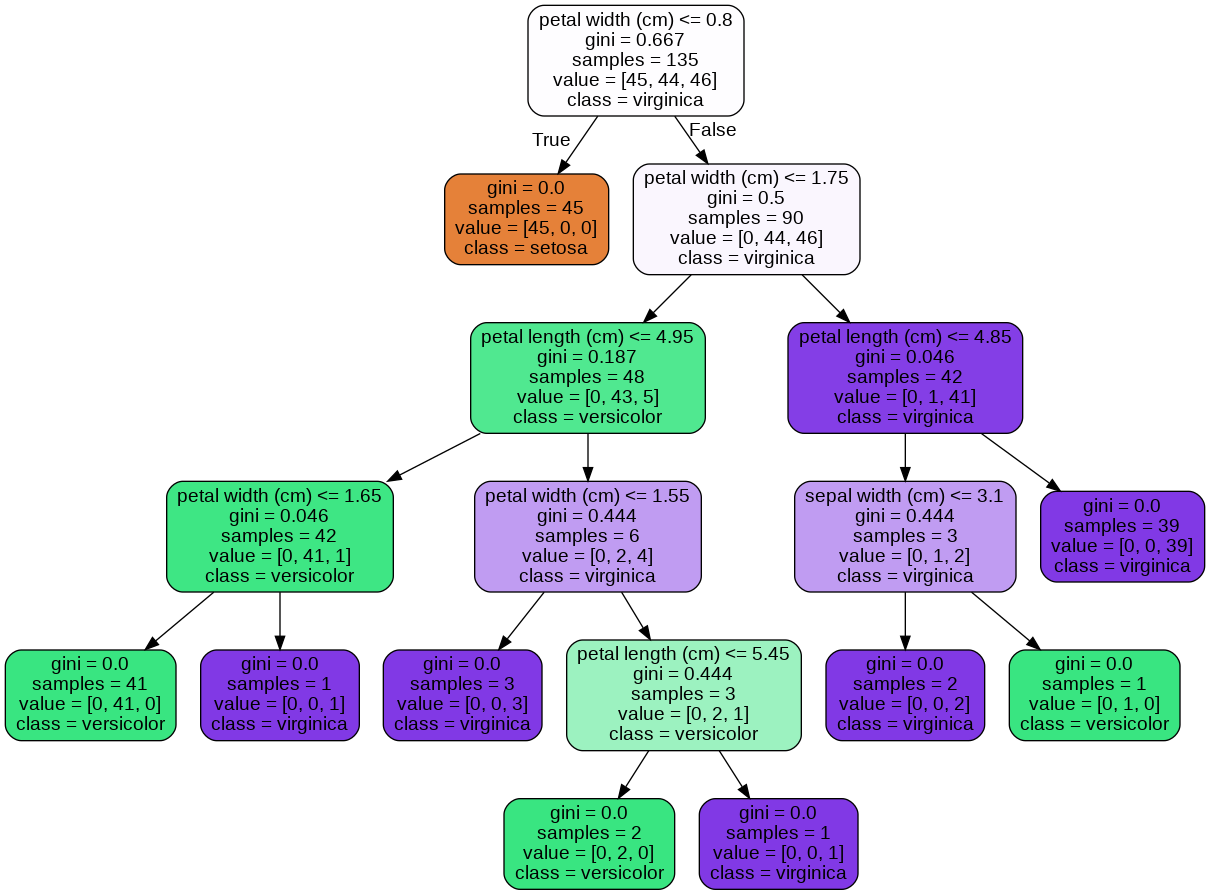

In [9]:
export_graphviz(
        tree_classifier,
        out_file="img\desision_tree.dot",
        feature_names=iris.feature_names[:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
)

(graph,) = pydot.graph_from_dot_file('img\desision_tree.dot')
graph.write_png('img\desision_tree.png')

Image(filename='img\desision_tree.png')

## Evaluating the Model

In [10]:
sm.accuracy_score(df['Actual'],df['Predicted'])

1.0

## Conclusion

As we can see the Decision Tree model predicts the data with 100% accuracy. Thus here I can say that the task - 3 is fulfilled which consisted **Training**,**Visualising** & **Evaluating** the model.
